In [2]:
import requests  
from bs4 import BeautifulSoup
import time
import pandas as pd

Группа 208:
Шляхова Анастасия, Гусарова Виктория, Черкашин Павел


# Шаг 1
парсинг данных кинопоиска

In [ ]:
import requests  
from bs4 import BeautifulSoup
import time
import pandas as pd


page='1'
films_main = dict()
film_names = []
film_rating = []
film_count = []
count = 0
k = 0
film_country_and_genre = []
film_original = []
film_year = []
for i in range(1,11):
    page = str(i)
    url = 'https://www.kinopoisk.ru/lists/top500/?page='+page+'&tab=all'
    response = requests.get(url, headers={'User-Agent': UserAgent().safari})
    tree = BeautifulSoup(response.content, 'html.parser')
    f_names = tree.find_all('p', {'class' : 'selection-film-item-meta__name'})
    f_country_and_genre = tree.find_all('span', {'class' : 'selection-film-item-meta__meta-additional-item'})
    time.sleep(2)
    f_rating = tree.find_all('span', {'class': 'rating__value rating__value_positive'})
    f_count = tree.find_all('span', {'class': 'rating__count'})
    time.sleep(1)
    f_original = tree.find_all('p', {'class' : 'selection-film-item-meta__original-name'})
    for f in f_original:
        if len(f.text) == 4:
            film_original.append('-')
            film_year.append(f.text)
        elif len(f.text.split(', ')) > 2:
            film_original.append(f.text[:-6])
            film_year.append(f.text[-4:])
        else:
            original, year = f.text.split(', ')[0], f.text.split(', ')[-1]
            film_original.append(original)
            film_year.append(year)
    for n in f_names:
        film_names.append(n.text)
        k += 1
    for c in f_country_and_genre:
        film_country_and_genre.append(c.text)
        count += 1
    for u in f_rating:
        film_rating.append(u.text)
    time.sleep(2)
    for y in f_count:
        film_count.append(y.text)
print(k, count)

sample_forig = film_original
sample_fyear = film_year
sample_frating = film_rating
sample_fcount = film_count
sample_fcandg = film_country_and_genre
sample_fnames = film_names
sample_fhref = film_href
sample_main = dict()

for i in range(500):
    sample_main[sample_fnames[i]] = {'position': str(i+1), 'country': sample_fcandg[2*i], 'genre': sample_fcandg[2*i+1], 'original name': sample_forig[i],
                                'year': sample_fyear[i], 'rating': sample_frating[i], 'count': sample_fcount[i]}

df = pd.DataFrame.from_dict(sample_main).T
df.to_csv('films500.csv')


парсинг данных IMDB

In [ ]:
import re 
import requests
from bs4 import BeautifulSoup
import time
films_imbd_names = []
films_imbd_rat = []
films_imbd = dict()
for i in range (1, 6):
    url = "https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=" + str(1+100*(i-1))
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    c = 0
    f_imbd = tree.select('a[href*="/title/tt"]') 
    for e in f_imbd:
        if (str(e).find('/">') != -1) and (str(e).find("img alt") == -1): # фильтруем
            films_imbd_names.append(e.text)
    f_imbd_rating = tree.find_all("strong")
    for t in f_imbd_rating:
        c += 1
        if c > 2: # первые две строки нам не нужны просто
            films_imbd_rat.append(t.text)
for q in range (0, 500):
    films_imbd[films_imbd_names[q]] = [films_imbd_rat[q], q + 1]
print(films_imbd)        

sample_imdbn = films_imbd_names
sample_imdbr = films_imbd_rat

for q in range (0, 500):
    films_imbd[sample_imdbn[q]] = {'rating_IMBD': sample_imdbr[q], 'position_IMDB': q + 1}
df = pd.DataFrame.from_dict(films_imbd).T
df.to_csv('films_IMDB.csv')

In [16]:
df_imdb = pd.read_csv('/Users/anastasiaslahova/Desktop/дз-4 питон/films_IMDB.csv') # достаем файлы с данными, что запарсили
df_kinopoisk = pd.read_csv('/Users/anastasiaslahova/Desktop/дз-4 питон/films500.csv')
df_imdb.rename(columns={'Unnamed: 0': 'title'}, inplace=True)
df_kinopoisk.rename(columns={'Unnamed: 0': 'title'}, inplace=True)
df_merged = pd.merge(df_kinopoisk, df_imdb,left_on='title', right_on='title', how='left') # объединяем данные таким образом,
# что, фильмы которые есть в imdb, но не в кинопоиске, не учитываются
df_merged.to_csv('kinopoisk&IMDB.csv') 
df_merged

,title,position,country,genre,original name,year,rating,count,rating_IMBD,position_IMDB
0,Побег из Шоушенка,1,США,драма,"Shawshank Redemption, The",1994,9.1,765 476,9.3,1.0
1,Зеленая миля,2,США,"фэнтези, драма","Green Mile, The",1999,9.1,667 940,NaN,NaN
2,Властелин колец: Возвращение короля,3,"Новая Зеландия, США","фэнтези, приключения","Lord of the Rings: The Return of the King, The",2003,8.6,462 500,8.9,7.0
3,Интерстеллар,4,"США, Великобритания","фантастика, драма",Interstellar,2014,8.6,693 798,8.6,22.0
4,Властелин колец: Две крепости,5,"Новая Зеландия, США","фэнтези, приключения","Lord of the Rings: The Two Towers, The",2002,8.6,444 233,8.7,16.0
...,...,...,...,...,...,...,...,...,...,...
495,Исходный код,496,"США, Канада","фантастика, боевик",Source Code,2011,7.8,340 509,NaN,NaN
496,Белые росы,497,СССР,"драма, мелодрама",-,1983,8.2,32 570,NaN,NaN
497,Мстители: Финал,498,США,"фантастика, боевик",Avengers: Endgame,2019,7.6,476 848,8.4,64.0
498,Истребитель демонов: Поезд «Бесконечный»,499,Япония,"аниме, мультфильм",Kimetsu no Yaiba: Mugen Ressha-Hen,2020,7.9,12 240,NaN,NaN


# Шаг 2


In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          500 non-null    object 
 1   position       500 non-null    int64  
 2   country        500 non-null    object 
 3   genre          500 non-null    object 
 4   original name  500 non-null    object 
 5   year           500 non-null    int64  
 6   rating         500 non-null    float64
 7   count          500 non-null    object 
 8   rating_IMBD    176 non-null    float64
 9   position_IMDB  176 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 43.0+ KB


In [7]:
df_merged.isnull().sum().sort_values() # 324 фильма из рейтинга top-500 imdb нет в кинопоиске

title              0
position           0
country            0
genre              0
original name      0
year               0
rating             0
count              0
rating_IMBD      324
position_IMDB    324
dtype: int64

# Шaг 3

In [25]:
df_merged['2010-2021'] = df_merged['year'].map(lambda x: 1 if x>=2010 else 0) # добавляем столбцы по временному промежутку выпуска фильмов
df_merged['2000-2009'] = df_merged['year'].map(lambda x: 1 if 2000<=x<=2009 else 0)
df_merged['1990-1999'] = df_merged['year'].map(lambda x: 1 if 1990<=x<=1999 else 0)
df_merged['1980-1989'] = df_merged['year'].map(lambda x: 1 if 1980<=x<=1989 else 0)
df_merged['before 1980'] = df_merged['year'].map(lambda x: 1 if x<=1979 else 0)

df_merged['delta'] = df_merged['rating'] - df_merged['rating_IMBD'] # добавляем столбец по разнице в значениях между рейтингом кинопоиска и imdb
df_merged['main_genre'] = df_merged['genre'].map(lambda x: x.split(', ')[0]) # добавляем столбец с главным жанром
df_merged.to_csv('kinopoisk.csv')

In [26]:
df_merged

,title,position,country,genre,original name,year,rating,count,rating_IMBD,position_IMDB,2010-2021,2000-2009,1990-1999,1980-1989,before 1980,delta,main_genre
0,Побег из Шоушенка,1,США,драма,"Shawshank Redemption, The",1994,9.1,765 476,9.3,1.0,0,0,1,0,0,-0.2,драма
1,Зеленая миля,2,США,"фэнтези, драма","Green Mile, The",1999,9.1,667 940,NaN,NaN,0,0,1,0,0,NaN,фэнтези
2,Властелин колец: Возвращение короля,3,"Новая Зеландия, США","фэнтези, приключения","Lord of the Rings: The Return of the King, The",2003,8.6,462 500,8.9,7.0,0,1,0,0,0,-0.3,фэнтези
3,Интерстеллар,4,"США, Великобритания","фантастика, драма",Interstellar,2014,8.6,693 798,8.6,22.0,1,0,0,0,0,0.0,фантастика
4,Властелин колец: Две крепости,5,"Новая Зеландия, США","фэнтези, приключения","Lord of the Rings: The Two Towers, The",2002,8.6,444 233,8.7,16.0,0,1,0,0,0,-0.1,фэнтези
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Исходный код,496,"США, Канада","фантастика, боевик",Source Code,2011,7.8,340 509,NaN,NaN,1,0,0,0,0,NaN,фантастика
496,Белые росы,497,СССР,"драма, мелодрама",-,1983,8.2,32 570,NaN,NaN,0,0,0,1,0,NaN,драма
497,Мстители: Финал,498,США,"фантастика, боевик",Avengers: Endgame,2019,7.6,476 848,8.4,64.0,1,0,0,0,0,-0.8,фантастика
498,Истребитель демонов: Поезд «Бесконечный»,499,Япония,"аниме, мультфильм",Kimetsu no Yaiba: Mugen Ressha-Hen,2020,7.9,12 240,NaN,NaN,1,0,0,0,0,NaN,аниме


# Шаг 4-5

In [19]:
df_merged['delta'].mean() 

-0.12443181818181821

Среднее значение дельты отрицательное. Следовательно, оценка пользователей на imdb более лояльная, чем на кинопоиске.

In [29]:
df_merged.groupby('main_genre')['title'].count()

main_genre
аниме           20
биография        7
боевик          35
вестерн          4
военный          7
детектив         3
драма          142
история          2
комедия         31
криминал        11
мелодрама       24
мультфильм      61
мюзикл           7
приключения      6
семейный         1
спорт            1
триллер         39
ужасы            7
фантастика      57
фильм-нуар       1
фэнтези         34
Name: title, dtype: int64

Больше всего фильмов в топ-500 кинопоиска принадлежат жанрам драма, мультфильм и фантастика, что свидельствует о желании людей переживать сильные, незаурядные эмоции(драма), а также их желание уйти от реальности и придаться эскапизму(мульфильм, фантастика).

In [30]:
df_merged.groupby('main_genre')['rating'].mean()

main_genre
аниме          8.090000
биография      7.985714
боевик         7.928571
вестерн        8.200000
военный        8.214286
детектив       8.266667
драма          8.080282
история        8.200000
комедия        8.058065
криминал       8.281818
мелодрама      8.095833
мультфильм     8.003279
мюзикл         8.000000
приключения    7.900000
семейный       7.600000
спорт          8.100000
триллер        8.010256
ужасы          7.885714
фантастика     8.000000
фильм-нуар     8.100000
фэнтези        8.055882
Name: rating, dtype: float64

Фильмы, относящиеся к жанрам криминал и военной тематике, вызывают наибольший отклик в душах пользователей кинопоиска, то есть в основном россиян. Это не удивительно, так для нашего народа особенно болезненна тема Великой Отечественной войны и суровых, страшных пережитых 90ых.


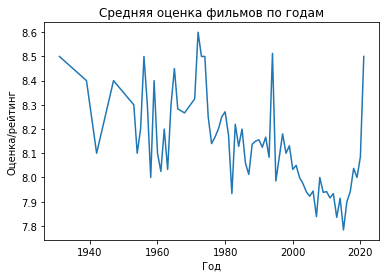

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
f = open('kinopoisk&IMDB.csv', 'r', encoding ="utf-8")
df = pd.read_csv(f)
x = df.groupby("year")["rating"].mean()
plt.plot(x)
plt.title("Средняя оценка фильмов по годам")
plt.xlabel("Год")
plt.ylabel("Оценка/рейтинг");

Заметно, что график довольно неоднородный, но с уверенностью можно сказать, что на данный момент наблюдается резкий подъем количества высокооцененных фильмов. Можно предположить, что это связано с появлением большого количества онлайн-кинотеатров и стриминг сервисов, таких как Netflix, Amazon, Disney+, а также российских аналогов - Start, TNT Premier и так далее.

208 - количество американских фильмов
11 - количество российских фильмов
61 - количество советских фильмов
439 - количество фильмов из других стран/совместного производства
                Страна  Доля
0                  США  41.6
1                 СССР  12.2
2  Великобритания, США   5.4
3  США, Великобритания   5.2
4               Япония   3.8
5               Россия   2.2
6          США, Канада   2.2


<BarContainer object of 7 artists>

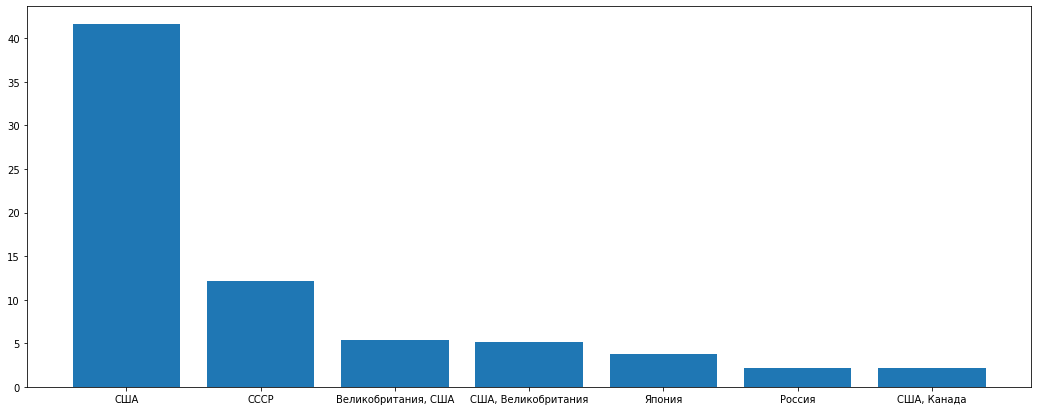

In [9]:
print(df[df["country"] == "США"]["title"].count(), "- количество американских фильмов")
print(df[df["country"] == "Россия"]["title"].count(), "- количество российских фильмов")
print(df[df["country"] == "СССР"]["title"].count(), "- количество советских фильмов")
print(df[df["country"] != ("СССР" or "Россия" or "США")]["title"].count(), "- количество фильмов из других стран/совместного производства")
fig, ax = plt.subplots(1,1, figsize=(18,7))
x = df["country"].value_counts(normalize = True).mul(100).to_frame()
x = x.reset_index()
x.columns = ("Страна", "Доля")
r = x.head(7)
print(r)
ax.bar(r["Страна"], r["Доля"])

Очевидно, что наибольшая доля фильмов приходится на США. Следом идет СССР, что свидетельствует о любви россиян к советским фильмам. Также можно заметить почти одинаковое количество фильмов снятых в основном в Великобритарнии, но в сотдрудничестве с США и, наоборот, в основном в США, но с сотрудничеством с Британией, так как, действително, эти две страны можно назвать локомотивами современного кинемотографа. На пятом месте удивительным образом оказалась Япония - уникальная культура и любовь западных критиков сыграли свое дело.

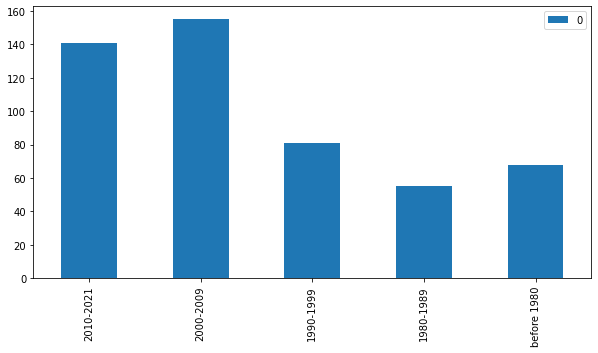

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(1,1, figsize=(10,5)) 
x = pd.DataFrame({'2010-2021': [df_merged['2010-2021'].sum()], '2000-2009': [df_merged['2000-2009'].sum()],
                  '1990-1999': [df_merged['1990-1999'].sum()], '1980-1989': [df_merged['1980-1989'].sum()],
                  'before 1980': [df_merged['before 1980'].sum()]}).T
x.plot(kind='bar', ax=ax);

Наибольшое количество фильмов приходится на 2000-2009 года, что говорит, скорее, о большем объеме выпускаемых фильмов в это время, нежели об их качестве, так как двумя графиками ранее видно, что средняя оценка в нулевые находится ниже всех. При этом следом идут десятые, что не может не радовать, так как это говорит и о большом объеме снимаемых фильмов, и о высоком качестве, как мы уже выяснили ранее.